<a href="https://colab.research.google.com/github/habonimana/PyTorch-for-Deep-Learning/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps

* get data ready (turn into tensors)
* Build or pick a pretrained model (to suit your problem)
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Dave and reload your trained model



## What we're going to cover

In this module we're going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # these are the basic building blocks for graphs:
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.0+cpu'

1. Data (preparing and loading)
* turn data into numbers
* build model to learn patterns in numbers

 Data can be almost anything ... in machine learning
 * Excel spreadsheed
 * image of any kind
 * Videos (youtube..)
 * Text
 * DNA
 Machine learning is a game of two things:
 * get data into a numerical representation
 * Build a model to learn numerical patterns (Learns representation (patterns/features/weights) and Representation outputs)

 To showcase thism let's create a known data using the linear regression formular.
 We'll yse a linear regression formula to make a straight line with know parameters 

 https://www.geeksforgeeks.org/linear-regression-formula/
 Y = a + b*x
 

In [3]:
# Create *known* parameters using lineal regression
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## 1. Split Data: The most important concept in machine learning 
* training set
* validation set (tune model patterns)
* test set (see if the model is ready for the world)
*
- the whole purpose is generalization: Generalization is the ability of the model to perform well on data it hasn't seen before
- You do not always need validation set
- 80 and 20% is the most populat split


In [5]:

# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

visualize, visualize, visualize

In [7]:
def plot_predictions(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
    """ 
    Plots training data, test data and compare predictions
    """

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label= "Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exist 
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    # show the legend
    plt.legend(prop = {"size":14})

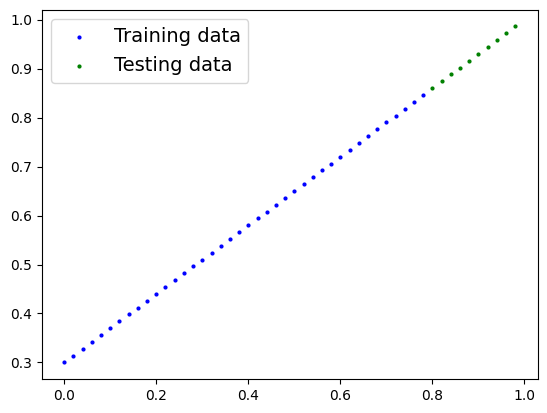

In [8]:
plot_predictions()

## 2. Build model
- our first PyTorch model!
- It is going to be a lineal regression model
- This is to be done through a forward computation model

what our model does (we are trying to guess the weight and bias):
* start with random values (weight * bias )
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 

Through two main algorithms:
1. Gradient descent (when we set requires_grad=True)
2. Backpropagation


In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
    # Almost everything inherit from nn module
    # it is the base class for all neural network modules 

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # these parameters are going to be random and model is PyTorch is supposed to look at our data and update them to best represent our know parameters
                                                requires_grad=True,
                                                dtype = torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model

        def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x + self.bias # this is the linear regression formula
        
        
